# __Text Classification Using LSTM__


Let's see how to classify the text using LSTM (Long Short-Term Memory).

In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Steps to  be followed:

1. Import the libraries
2. Define the hyperparameter
3. Preprocess the data and print the lengths of the labels and articles lists
4. Split the data into training and validation sets
5. Initialize a tokenizer and fitting it to the training articles
6. Convert the training articles into sequences using the tokenizer
7. Pad the sequence
8. Print the length of validation sequences and the shape of validation padded
9. Train the model
10. Compile the model
11. Plot the graph

### Step 1: Import the libraries
- Import the required libraries.

In [2]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
import matplotlib.pyplot as plt


### Step 2: Define the hyperparameter
- Set the value of __vocab_size__ to __5000__, representing the size of the vocabulary.
- Set the value of __embedding_dim__ to __64__, specifying the dimensionality of the word embeddings.
- Set the value of __max_length__ to __200__, indicating the maximum length of input sequences.
- Set the value of __padding_type__ to __post__, specifying that padding should be added at the end of sequences.
- Set the value of __trunc_type__ to __post__, indicating that truncation should be applied at the end of sequences.
- Set the value of __oov_tok__ to __OOV__, representing the token to be used for out-of-vocabulary words.
- Set the value of __training_portion__ to __0.8__, representing the proportion of data to be used for training.

In [3]:
vocab_size = 5000
embedding_dim = 64
max_length = 200
padding_type = 'post'
trunc_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

### Step 3: Preprocess the data and print the lengths of the labels and articles lists

- Define two empty lists, articles, and labels to store the articles and labels, respectively.
- Read the contents of the **bbc-text.csv** file using csv.reader and iterate through each row.
- Extract the label from the first column of each row and append it to the labels list.
- Process the article from the second column by removing stopwords and replacing consecutive spaces with a single space, and then append it to the articles list.
- Print the lengths of the labels and articles lists to display the number of labels and processed articles, respectively.

In [4]:
articles = []
labels = []

with open("bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)  # skip header
    for row in reader:
        label, article = row
        article = ' '.join([word for word in article.split() if word not in STOPWORDS])
        articles.append(article)
        labels.append(label)
print(len(labels))
print(len(articles))

2225
2225


__Observations:__
- There are only **2,225** articles in the data.
- Then, we split into a training set and a validation set, according to the parameter we set earlier: 80% for training and 20% for validation.

### Step 4: Split the data into training and validation sets
- Calculate the **train_size** by multiplying the length of the articles list with __training_portion__ and converting it to an integer.
- Create **train_articles** by slicing the articles list from index **0** to **train_size.**
- Create **train_labels** by slicing the labels list from index **0** to **train_size.**
- Create validation_articles by slicing the articles list from **train_size** onward.
- Create **validation_labels** by slicing the labels list from **train_size** onward.
- Print the **train_size** to display the calculated value.

- The lengths of **train_articles**, **train_labels**, **validation_articles**, and **validation_labels** represent the number of items in each list.

In [5]:
from sklearn.preprocessing import LabelEncoder

# Convert labels to integers using LabelEncoder which automatically makes them 0-indexed
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

In [6]:
# Check unique labels and adjust the model's last Dense layer
num_classes = len(np.unique(labels_encoded))
print("Number of unique labels:", num_classes)


Number of unique labels: 5


In [7]:
# Split the data
train_size = int(len(articles) * training_portion)
train_articles = articles[:train_size]
training_label_seq = labels_encoded[:train_size]

validation_articles = articles[train_size:]
validation_label_seq = labels_encoded[train_size:]


print(train_size)
print(len(train_articles))
print(len(training_label_seq))
print(len(validation_articles))
print(len(validation_label_seq))

1780
1780
1780
445
445


__Observations:__
- The value of **train_size** is calculated based on the proportion of training data.
- The lengths of **train_articles**, **training_label_seq**, **validation_articles**, and **validation_label_seq** representing the number of items in each list.

### Step 5: Initialize a tokenizer and fit it on the training articles

- Initialize a **Tokenizer** object named tokenizer with the specified parameters: **num_words** representing the vocabulary size and **oov_token** representing the out-of-vocabulary token.
- Fit the tokenizer on the training articles **(train_articles)** using the **fit_on_texts** method.

  `fit_on_texts`: Updates internal vocabulary based on a list of texts. This method creates the vocabulary index based on word frequency. So if you give it a sample sentence like

    `The cat sat on the mat.`

  It will create a dictionary, where every word gets a unique integer value. 0 is reserved for padding.
      word_index["the"] = 1; word_index["cat"] = 2
- This step updates the tokenizer's internal word index based on the words in the training articles.
- Assign the word index obtained from the tokenizer to the variable **word_index.**
- Extract the first 10 items from the word_index dictionary.
- Print the resulting dictionary.

In [8]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index

In [9]:
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 'said': 2,
 'mr': 3,
 'would': 4,
 'year': 5,
 'also': 6,
 'people': 7,
 'new': 8,
 'us': 9,
 'one': 10}

__Observations:__
- The code prints a dictionary containing the first 10 items from the word_index dictionary.
- These items represent a subset of the word-to-index mappings generated by the tokenizer.

### Step 6: Convert the training articles into sequences using the tokenizer
- Convert the training articles **(train_articles)** into sequences of numbers using the `texts_to_sequences` method of the tokenizer object and assign the result to `train_sequences.` variable
    
- Print the sequence representation of the 11th training article (index 10) by accessing **train_sequences[10].**

In [10]:
train_sequences  = tokenizer.texts_to_sequences(train_articles)

# train_sequences is a list of lists
print(train_sequences[10])

[2430, 1, 225, 4991, 22, 641, 586, 225, 4991, 1, 1, 1660, 1, 1, 2430, 22, 564, 1, 1, 140, 278, 1, 140, 278, 796, 822, 661, 2305, 1, 1144, 1691, 1, 1718, 4992, 1, 1, 1, 1, 1, 4733, 1, 1, 122, 4510, 1, 2, 2873, 1503, 352, 4734, 1, 52, 341, 1, 352, 2170, 3958, 41, 22, 3792, 1, 1, 1, 1, 542, 1, 1, 1, 834, 631, 2365, 347, 4735, 1, 365, 22, 1, 787, 2366, 1, 4298, 138, 10, 1, 3663, 681, 3531, 1, 22, 1, 414, 822, 661, 1, 90, 13, 633, 1, 225, 4991, 1, 598, 1, 1691, 1021, 1, 4993, 807, 1861, 117, 1, 1, 1, 2973, 22, 1, 99, 278, 1, 1604, 4994, 542, 492, 1, 1441, 4736, 778, 1319, 1, 1858, 10, 33, 641, 319, 1, 62, 478, 564, 301, 1504, 22, 479, 1, 1, 1663, 1, 797, 1, 3065, 1, 1363, 6, 1, 2430, 564, 22, 2970, 4730, 1, 1, 1, 1, 1, 850, 39, 1822, 674, 297, 26, 979, 1, 882, 22, 361, 22, 13, 301, 1504, 1341, 374, 20, 63, 883, 1096, 4299, 247]


__Observation:__
- The code prints the sequence representation of the 11th training article (index 10) in the **train_sequences** list.
- The output is a list of integers, where each integer represents the index of a word in the tokenizer's word index vocabulary that corresponds to a word in the article.

### Step 7: Pad the sequence
-  After converting text to sequence we pad the sequences in **train_sequences** using the `pad_sequences` function. It is done so that every sequence has the same length.
  
- Set the maximum length of the padded sequences to **max_length.**
- Specify the padding type as **padding_type** and the truncation type as **trunc_type.** If a sequence length is larger than the provided maxlen value then, these values will be truncated to maxlen. ‘pre’ option will truncate at the beginning where as ‘post’ will truncate at the end of the sequences.
- Assign the padded sequences to the variable **train_padded.**

In [11]:
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [13]:
train_padded[10]

array([2430,    1,  225, 4991,   22,  641,  586,  225, 4991,    1,    1,
       1660,    1,    1, 2430,   22,  564,    1,    1,  140,  278,    1,
        140,  278,  796,  822,  661, 2305,    1, 1144, 1691,    1, 1718,
       4992,    1,    1,    1,    1,    1, 4733,    1,    1,  122, 4510,
          1,    2, 2873, 1503,  352, 4734,    1,   52,  341,    1,  352,
       2170, 3958,   41,   22, 3792,    1,    1,    1,    1,  542,    1,
          1,    1,  834,  631, 2365,  347, 4735,    1,  365,   22,    1,
        787, 2366,    1, 4298,  138,   10,    1, 3663,  681, 3531,    1,
         22,    1,  414,  822,  661,    1,   90,   13,  633,    1,  225,
       4991,    1,  598,    1, 1691, 1021,    1, 4993,  807, 1861,  117,
          1,    1,    1, 2973,   22,    1,   99,  278,    1, 1604, 4994,
        542,  492,    1, 1441, 4736,  778, 1319,    1, 1858,   10,   33,
        641,  319,    1,   62,  478,  564,  301, 1504,   22,  479,    1,
          1, 1663,    1,  797,    1, 3065,    1, 13

In [ ]:
print(len(train_padded[12]))

200


__Observations:__
- The code prints the sequence representation of the 11th training article (index 10) in the **train_sequences** list.
- The output is a list of integers, where each integer represents the index of a word in the tokenizer's word index vocabulary that corresponds to a word in the article.

__Observation:__
- The code prints the padded sequence representation of the 11th training article.
- The output is a list of integers representing the word indices of the corresponding words in the article, after applying padding to ensure a consistent length (max_length) for all sequences.

### Step 8: Print the length of validation sequences and the shape of validation padded
- Convert the validation articles into sequences using the tokenizer and pad the sequences to a maximum length. Assign the result to **validation_padded.**
- Print the length of **validation_sequences** and the shape of **validation_padded.**
- Create a tokenizer for the labels and fit it on the labels list.
- Convert the training and validation labels into sequences using the label tokenizer and store the results in **training_label_seq** and **validation_label_seq** as NumPy arrays.

In [14]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

445
(445, 200)


__Observations:__
- The length of **validation_sequences**, indicating the number of sequences in the validation set.
- The shape of **validation_padded**, representing the dimensions of the padded validation sequences.

In [15]:
# Confirm that labels are correctly zero-indexed
print("Unique training labels:", np.unique(training_label_seq))
print("Unique validation labels:", np.unique(validation_label_seq))

Unique training labels: [0 1 2 3 4]
Unique validation labels: [0 1 2 3 4]


__Observations:__
- The output of this code is the conversion of label sequences for the training and validation sets.
- The **training_label_seq** and **validation_label_seq** are NumPy arrays containing the label sequences for the respective sets, based on the word index mapping generated by the **label_tokenizer**

### Step 9: Train the model
- Create a sequential model using **tf.keras.Sequential().**
- Add an embedding layer to the model with the specified vocabulary size **(vocab_size)** and embedding dimension **(embedding_dim).**
- Add a bidirectional LSTM layer to the model with the same embedding dimension.
- Add a dense layer to the model with the embedding dimension as the number of units and **ReLU** activation function.
- Add a dense layer with `num_classes` units and the **softmax** activation function to the model.
- Print a summary of the model's architecture using **model.summary().**

In [25]:
model = tf.keras.Sequential([

    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),

    tf.keras.layers.Dense(num_classes, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          320000    
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               66048     
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 5)                 325       
                                                                 
Total params: 394629 (1.51 MB)
Trainable params: 394629 (1.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


__Observation:__
- The code outputs a summary of the model's architecture, including the number of parameters and the shape of each layer in the model.

### Step 10: Compile the model
- Compile the model using **model.compile()** with the loss function set to **sparse_categorical_crossentropy**, the optimizer set to **adam**, and the metrics set to **accuracy.**
- Set the number of epochs to 10.
- Train the model using **model.fit()** with the training padded sequences **(train_padded)** and training label sequences **(training_label_seq).**
- Specify the number of epochs as **num_epochs**, the validation data as the validation padded sequences **(validation_padded)** and validation label sequences **(validation_label_seq)**, and **verbose** mode as **2.**

In [26]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
num_epochs = 10

history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)


Epoch 1/10
56/56 - 21s - loss: 1.4039 - accuracy: 0.3770 - val_loss: 1.1479 - val_accuracy: 0.5730 - 21s/epoch - 367ms/step
Epoch 2/10
56/56 - 13s - loss: 1.1240 - accuracy: 0.5483 - val_loss: 1.0312 - val_accuracy: 0.5775 - 13s/epoch - 237ms/step
Epoch 3/10
56/56 - 14s - loss: 0.8561 - accuracy: 0.6865 - val_loss: 0.8917 - val_accuracy: 0.6697 - 14s/epoch - 246ms/step
Epoch 4/10
56/56 - 13s - loss: 0.5304 - accuracy: 0.8371 - val_loss: 0.4812 - val_accuracy: 0.8247 - 13s/epoch - 236ms/step
Epoch 5/10
56/56 - 15s - loss: 0.2006 - accuracy: 0.9399 - val_loss: 0.3687 - val_accuracy: 0.8674 - 15s/epoch - 266ms/step
Epoch 6/10
56/56 - 14s - loss: 0.1023 - accuracy: 0.9713 - val_loss: 0.2520 - val_accuracy: 0.9236 - 14s/epoch - 242ms/step
Epoch 7/10
56/56 - 13s - loss: 0.0408 - accuracy: 0.9888 - val_loss: 0.2770 - val_accuracy: 0.9124 - 13s/epoch - 227ms/step
Epoch 8/10
56/56 - 12s - loss: 0.0207 - accuracy: 0.9961 - val_loss: 0.2351 - val_accuracy: 0.9371 - 12s/epoch - 222ms/step
Epoch 9/

__Observations:__
- The code trains the model for the specified number of epochs and records the training and validation accuracy and loss metrics.
- The output is an object named history that contains information about the training process, such as the loss and accuracy values at each epoch.

### Step 11: Plot the graph
- Define a function named **plot_graphs** that takes history and strings as inputs. Inside the function, plot the training and validation values of the given metric (string) from the history object using **plt.plot().**
- Set the x-axis label as **Epochs** and the y-axis label as the given metric (string).
- Call the **plot_graphs** function twice, first with **history** and **accuracy** as arguments, and then with **history** and **loss** as arguments.
- Display the generated plots showing the training and validation values of the accuracy and loss metrics over the epochs.

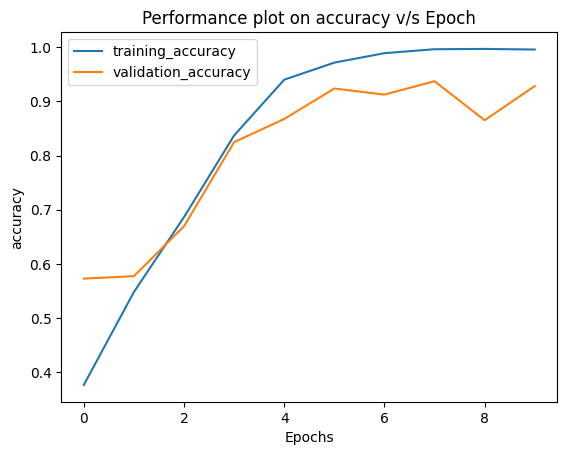

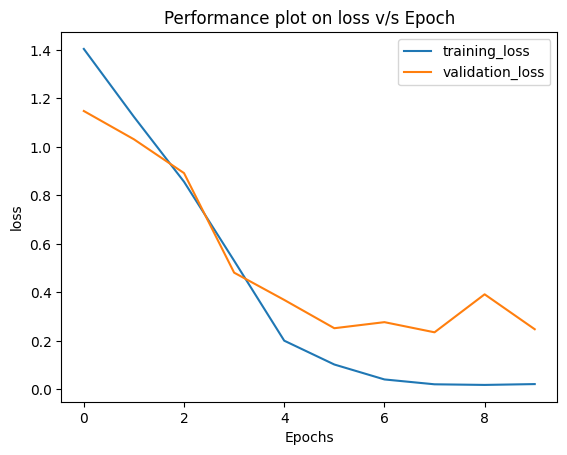

In [28]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.title("Performance plot on "+string+" v/s Epoch")
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend(['training_'+string, 'validation_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

#### __Observation__

The plots dislay the trends in training and validation accuracy and loss over the epochs, highlighting the model's learning progress and any discrepancies between training and validation performance. This helps assess the model's generalization and identify potential overfitting or underfitting.

**Accuracy plot:**

- The performance plot for your LSTM-based text classification model shows a quick improvement in both training and validation accuracy during the initial epochs, with training accuracy nearing perfection and validation accuracy plateauing, indicating potential overfitting.
- The divergence between training and validation accuracy suggests the model may be learning noise and complex patterns from the training data that do not generalize well to new data

**Loss plot**


- The loss plot for the LSTM-based model shows a sharp decrease in both training and validation loss initially, converging to a lower point as epochs increase.
- When training loss continues to drop and approaches near zero, validation loss stabilizes and flattens out at a higher level, which doesn't decrease further as epochs progress. This pattern indicates that the model may be overfitting the training data, as it continues to perform better on training data while not showing equivalent improvements on validation data


In [29]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(validation_padded, validation_label_seq, verbose=2)
print(f"Validation loss: {val_loss}")
print(f"Validation accuracy: {val_accuracy}")

14/14 - 1s - loss: 0.2478 - accuracy: 0.9281 - 757ms/epoch - 54ms/step
Validation loss: 0.24781708419322968
Validation accuracy: 0.9280899167060852


In [30]:
# Evaluate the model on the training set
train_loss, train_accuracy = model.evaluate(train_padded, training_label_seq, verbose=2)
print(f"Training loss: {train_loss}")
print(f"Training accuracy: {train_accuracy}")

56/56 - 6s - loss: 0.0086 - accuracy: 1.0000 - 6s/epoch - 105ms/step
Training loss: 0.00861306767910719
Training accuracy: 1.0
